# **Importing Packages**

In [ ]:
!pip install "pandas == 2.0.3"
!pip install "numpy == 1.25.2"
!pip install "plotly == 5.15.0"
!pip install "statsmodels == 0.14.2"
!pip install "matplotlib == 3.7.1"
!pip install "networkx == 3.1"
!pip install "seaborn == 0.13.1"
!pip install "community == 1.0.0b1"
!pip install "scikit-learn == 1.2.2"

  Using cached plotly-5.15.0-py2.py3-none-any.whl.metadata (7.0 kB)
Using cached plotly-5.15.0-py2.py3-none-any.whl (15.5 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.1 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 93.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-l

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
import itertools

def flatten_list(nested_list):
    return list(itertools.chain(*nested_list))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading Data**

In [ ]:
# Read Cryptocurrency data
data_crypto = pd.read_csv("data/crypto_30min_filled_missing_value(ffill).csv")
data_crypto = data_crypto.set_index("date")

# Read Stock data
data_stock = pd.read_csv("data/stock_30min_official_trading_filled_missing(ffill).csv")
data_stock = data_stock.set_index("date")

# Read US ETF data
data_index = pd.read_csv("data/etfs_filled.csv").drop(columns = ["Unnamed: 0"])
remove_assets = ["GOVT","IEF", "IEI", "UVXY", "VIXM", "VIXY","VXX"] # do not use these ETFs
data_index = data_index.drop(columns = remove_assets)
data_index = data_index.set_index("date")

In [ ]:
# Merge all data together
data_merge = pd.concat([data_stock,data_crypto,data_index], axis = 1).dropna()

In [ ]:
data_merge

,AAPL,ABBV,ABB,ABT,ACN,ADBE,ADI,ADP,AIR,ALV,...,ROBT,RPG,RPV,SLYG,SLYV,SLY,SOXX,SPY,SVXY,XTN
date,,,,,,,,,,,,,,,,,,,,,
2019-04-01 09:30:00,46.0119,65.8027,16.3608,74.8287,165.3043,269.465,99.4959,147.6773,32.8144,69.7456,...,31.8125,113.6350,58.4213,57.9693,57.1022,63.6230,183.6368,268.5800,52.46,58.4137
2019-04-01 10:00:00,45.7218,66.0483,16.4551,74.7213,165.3476,269.495,99.7834,147.5852,33.0416,70.4788,...,31.8521,113.5513,58.7792,58.1034,57.3700,63.8498,184.3252,268.8349,52.68,59.0457
2019-04-01 10:30:00,45.8307,65.9746,16.4636,74.7260,165.5674,269.570,99.6999,147.9351,32.9235,70.5246,...,31.9215,113.6513,58.6781,58.0020,57.1233,63.6229,184.3730,268.9057,52.67,58.9786
2019-04-01 11:00:00,46.0267,66.0237,16.3908,74.6980,165.6708,270.360,100.2377,148.4793,32.9037,70.3001,...,31.9214,113.7362,58.6691,57.9210,57.0701,63.5308,184.8797,269.1464,52.67,59.0445
2019-04-01 11:30:00,46.0267,65.9836,16.4418,74.6140,165.0318,270.640,100.0523,148.3219,32.9830,70.5521,...,31.9203,113.7781,58.7333,57.8523,57.0232,63.4908,184.7363,269.1120,52.75,59.0445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-03 13:30:00,169.8900,150.4200,36.2100,112.5900,278.0700,353.150,183.7100,218.9500,53.9500,84.8400,...,40.3700,149.8685,74.8200,71.1700,73.4200,81.0100,412.2200,412.1200,68.33,73.6800
2023-05-03 14:00:00,170.2450,149.5600,36.2900,112.6750,278.4150,350.840,184.6533,218.6550,54.2100,85.0850,...,40.6300,149.7800,74.8900,71.4400,73.4700,81.1425,413.8600,412.5700,68.68,74.1900
2023-05-03 14:30:00,170.0500,148.5600,36.2936,112.7400,278.1250,350.220,184.9700,218.5600,54.2700,85.2700,...,40.5552,149.9000,74.9700,71.4500,73.6008,81.2887,414.0400,412.1825,68.45,73.9800


**Convert prices to returns**

In [ ]:
# Find log-returns
names = data_merge.columns
numpy_data = data_merge.to_numpy()
original = numpy_data[:-1]
onelag = numpy_data[1:]
logreturns = np.log(onelag) - np.log(original)

return_data = pd.DataFrame(data = logreturns, columns = names)
return_data["date"] = data_merge.index[1:]
return_data = return_data.set_index(['date'])

In [ ]:
return_data_rm_UST = return_data.drop(columns = ["UST"]) # For the Ukraine-Russia conflict period, as UST was no longer available at this time
names_rm_UST = return_data_rm_UST.columns

In [ ]:
# Calculate the market return at each time point, i.e. the average return of all assets
market_return = pd.DataFrame(return_data.mean(axis=1), columns = ["mean market return"])
market_return.index = return_data.index

In [ ]:
fig_market_return = px.line(market_return, x='date', y= "mean market return", title='30-min market return (crypto_stock_etf)')

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['mean market return'] but received: date



---


We use the Cross-Sectional Absolute Deviation (CSAD) model to detect the herding behavior in financial markets. This is one of the most well-known herding behavior detection approaches that has been used widely in many studies.

The fundamental idea of this technique is to examine the relationship between the average return (market return) of a set of assets and the dispersion across each asset return (CSAD). A herding signal is pronounced when the market return changes significantly (i.e. the market experiences large fluctuations, either going up or down) while the dispersion between asset returns decreases (i.e. the return movements of different assets become more similar). In this study, we use two forms of the CSAD model for our experiments.
+ $CSAD_t = \beta_0 + \beta_1|r_{m,t}| + \beta_2 r_{m,t}^2 + \epsilon_t$
+ $CSAD_t = \gamma_0 + \gamma_1 D^{up} |r_{m,t}| + \gamma_2 D^{up} r_{m,t}^2 + \gamma_3 D^{down} |r_{m,t}| + \gamma_4 D^{down} r_{m,t}^2 + \zeta_t$

Where $CSAD_t = \sum\limits_{k = 1}^T |r_{i,t} - r_{m,t}| / T$; $r_{i,t}$ is the return of asset $i$ at time $t$; $r_{m,t} = \sum\limits_{k = 1}^{N} r_{k,t} / N $ is the average of asset returns (also known as the market return) at time $t$; $\beta_0, \beta_1, \beta_2, \gamma_0, \gamma_1, \gamma_2, \gamma_3, \gamma_4$ are regression coefficients, $D^{up} = 1$ if $r_{m,t}$ is positive, otherwise $0$; $D^{down} = 1$ if $r_{m,t}$ is negative, otherwise $0$; $\epsilon_t, \zeta_t$ are error terms at time $t$.

Regarding the first equation, a herding exists when the parameter $\beta_2$ is significantly negative (a negative coefficient with a confidence level of at least 90\%). Intuitively, we expect this coefficient to be negative because it follows the idea of the herding behavior, i.e. a dramatic increase or decrease in the market return ($r_{m,t}^2$) coincides with a decline (negative $\beta_2$) in the dispersion between corresponding assets' returns ($CSAD_t$). The second equation refers to a more detailed version of the first one in which we separate the market condition into $\textit{up}$ (i.e. positive market return) and $\textit{down}$ (i.e. non-positive market return) so that the herding can be detected during the $\textit{up}$ and $\textit{down}$ market condition separately, instead of considering all market conditions (i.e. both $\textit{up}$ and $\textit{down}$ equally) as declared in the first form. The use of both forms for herding detection comes from an expectation that there might be periods when herding does not exist when considering both up and down market conditions at the same time but it might be found in the $\textit{up}$ or $\textit{down}$ market condition only. To this end, the same logic of the first equation is applied to the second equation wherein a significantly negative $\gamma_2$ refers to a herding signal during the $\textit{up}$ market condition while a significantly negative $\gamma_4$ refers to a herding signal during the $\textit{down}$ market condition.


---





# **Timeline Partition**

**Time Division for Cryptocurrencies**

+ Pre-Covid-19: Start - 12.2019: [:13199]

+ Covid-19: 01.2020 - 06.2020 [13199:21935]

+ Bull Time 1: 07.2020 - 01.2021 [21935:32255]

+ Bull Time 2: 02.2021 - 08.2021 [32255:42431]

+ Bull Time 3: 09.2021 - 23.02.2022 [42431:50879]

+ U-R Conflict 1: 24.02.2022 - 09.2022 [50879:61391]

+ U-R Conflict 2: 10.2022 - end [61391:71711]


**Time Division for Traditional Assets**

+ Pre-Covid-19 : 04/2019 - 12/2019 -> return_data[:2464]

+ Covid-19     : 01/2020 - 06/2020 -> return_data[2464:4089]

+ Bull Time 1: 07/2020 - 1/2021 -> return_data[4089:5988]

+ Bull Time 2: 02/2021 - 08/2021 -> return_data[5988:7912]

+ Bull Time 3: 09/2021 - 23/02/2022 -> return_data[7912:9479]

+ U-R Conflict 1: 24/02/2022 - 09/2022 -> return_data[9479:11455]

+ U-R Conflict 2: 10/2022 - 05/2023 -> return_data[11455:]

# **Herding Detection at Community Level**

The code below is an example of herding detection at community level where we detect the herding behavior during the second Ukraine-Russia Conflict sub-period (time window 7). To work on other sub-periods, please amend the data directory address in "**community_noise_1**"

In [ ]:
# Read the community structure file
community_noise_1 = pd.read_csv("drive/MyDrive/Plos_revision/louvain_community/louvain_(crypto_stock_etf)_tw7.csv")
community_noise_1.columns = ["symbol", "group"]
ped_noise_1 = community_noise_1.groupby("group")
ped_noise_dict_1 = {}
for i in ped_noise_1:
  ped_noise_dict_1["group_"+ str(i[1]["group"].values[0])] =i[1]["symbol"].values

In [ ]:
ped_noise_dict_1

{'group_0': array(['AAPL', 'ADBE', 'BABA', 'GOOG', 'IDEX', 'INTU', 'META', 'MSFT',
        'NFLX', 'PDD', 'TSLA', 'FNGU', 'IYW', 'ONEQ', 'QQQ', 'QTEC',
        'ROBT'], dtype=object),
 'group_1': array(['BA', 'BTI', 'BUD', 'CI', 'COST', 'CSCO', 'CVS', 'DEO', 'ELV',
        'ETN', 'HON', 'IBM', 'LIN', 'LMT', 'MCD', 'TJX', 'UL', 'UNH',
        'WMT', 'DIA', 'DJD'], dtype=object),
 'group_2': array(['ABB', 'ALV', 'BHP', 'CNI', 'CP', 'CSL', 'HCA', 'HD', 'LOW', 'NVR',
        'UNP', 'UPS', 'IJH', 'IJJ', 'IJK', 'ITB', 'IYT', 'RPG', 'RPV',
        'XTN'], dtype=object),
 'group_3': array(['ABT', 'ACN', 'BDX', 'BSX', 'ISRG', 'MDT', 'SYK', 'SPY'],
       dtype=object),
 'group_4': array(['ADI', 'AMAT', 'AMD', 'ASML', 'ASX', 'AVGO', 'INTC', 'LRCX', 'MU',
        'NVDA', 'QCOM', 'TSM', 'TXN', 'SOXX'], dtype=object),
 'group_5': array(['ADP', 'BLK', 'DHR', 'TMO', 'IUSG', 'IWB', 'OEF', 'QYLD'],
       dtype=object),
 'group_6': array(['AIR', 'MC', 'IJR', 'IJS', 'IJT', 'IWM', 'SLYG', 'SLYV', 'SLY'],

In [ ]:
def csad_variables(data_frame):
  market_return = pd.DataFrame(data_frame.mean(axis=1), columns = ["mean market return"])
  market_return["date"] = data_frame.index


  market_return = market_return.set_index("date")
  market_return_repeat = pd.concat([market_return] * len(data_frame.columns), axis=1, ignore_index=True)
  market_return_repeat.columns = data_frame.columns


  csad = np.sum(np.abs(data_frame - market_return_repeat), axis = 1)/len(data_frame.columns)

  rmt = market_return.values
  rmt_abs = np.abs(market_return.values)
  rmt_squared = (market_return.values)**2
  alpha = np.ones(len(market_return))
  variables_csad = pd.DataFrame(data = np.asarray([csad.values, alpha, np.squeeze(rmt), np.squeeze(rmt_abs), np.squeeze(rmt_squared)]).T, columns = ["csad", "alpha", "rmt", "rmt_abs", "rmt_squared"])

  variables_csad.index = market_return.index


  return variables_csad


def csad_up_down_variables(data_frame):
  market_return = pd.DataFrame(data_frame.mean(axis=1), columns = ["mean market return"])
  market_return["date"] = data_frame.index


  market_return = market_return.set_index("date")
  market_return_repeat = pd.concat([market_return] * len(data_frame.columns), axis=1, ignore_index=True)
  market_return_repeat.columns = data_frame.columns


  csad = np.sum(np.abs(data_frame - market_return_repeat), axis = 1)/len(data_frame.columns)

  D_up_R_abs = market_return["mean market return"].apply(lambda x: x if x > 0.0 else 0.0)
  D_up_R_squared = market_return["mean market return"].apply(lambda x: x**2 if x> 0.0 else 0.0)
  D_down_R_abs = market_return["mean market return"].apply(lambda x: np.abs(x) if x < 0.0 else 0.0)
  D_down_R_squared = market_return["mean market return"].apply(lambda x: x**2 if x < 0.0 else 0.0)
  alpha = np.ones(len(market_return))

  variables_csad = pd.DataFrame(data = np.asarray([csad.values, alpha, D_up_R_abs, D_up_R_squared, D_down_R_abs, D_down_R_squared]).T, columns = ["csad", "alpha", "duprabs","duprsquared","ddownrabs","ddownrsquared"])

  variables_csad.index = market_return.index


  return variables_csad


In [ ]:
def csad_calculation(original_data, ped_dict, start, end):
  for i in list(ped_dict.keys()):
    print("Com "+ str(i[6:]) +": ", ped_dict[i])
    sub_frame = original_data[ped_dict[i]][start:end]
    variables_csad = csad_variables(sub_frame)

    X = variables_csad[['alpha', 'rmt_abs', 'rmt_squared']]
    Y = variables_csad["csad"]

    ## fit a OLS model with intercept on TV and Radio
    #X = sm.add_constant(X)
    est = sm.OLS(Y, X).fit()
    print(est.summary())



In [ ]:
def csad_up_down_calculation(original_data, ped_dict, start, end):
  for i in list(ped_dict.keys()):
    print("Com "+ str(i[6:]) +": ", ped_dict[i])
    sub_frame = original_data[ped_dict[i]][start:end]
    variables_csad = csad_up_down_variables(sub_frame)

    X = variables_csad[['alpha', 'duprabs', 'duprsquared', 'ddownrabs', 'ddownrsquared']]
    Y = variables_csad["csad"]

    ## fit a OLS model with intercept on TV and Radio
    #X = sm.add_constant(X)
    est = sm.OLS(Y, X).fit()
    print(est.summary())



In [ ]:
return_data[11454:None]

,AAPL,ABBV,ABB,ABT,ACN,ADBE,ADI,ADP,AIR,ALV,...,ROBT,RPG,RPV,SLYG,SLYV,SLY,SOXX,SPY,SVXY,XTN
date,,,,,,,,,,,,,,,,,,,,,
2022-09-30 15:30:00,-0.014309,-0.010726,-0.002918,-0.008231,-0.006582,-0.007601,-0.006652,-0.003839,-0.001389,-0.004642,...,-0.003857,-0.006772,-0.005353,-0.004692,-0.005346,-0.005137,-0.008041,-0.008031,-0.009321,-0.009456
2022-10-03 09:30:00,0.009585,0.016596,-0.054458,0.015531,0.008029,0.015181,0.014393,0.013568,0.006928,0.027606,...,0.007256,0.016404,0.010961,0.009071,0.008303,0.011269,0.018334,0.009640,0.016636,0.013447
2022-10-03 10:00:00,0.010631,0.007034,0.009421,0.008458,0.010523,0.007736,0.021901,0.006499,0.019147,0.020376,...,0.009253,0.008391,0.013917,0.014384,0.015238,0.006794,0.019003,0.010181,0.009269,0.008797
2022-10-03 10:30:00,0.002269,0.004602,-0.003265,-0.003840,0.000686,0.000816,-0.001454,-0.000802,-0.001356,-0.005091,...,0.003505,-0.000255,-0.000979,-0.000572,-0.001019,0.004674,-0.004094,-0.000056,0.000602,0.001708
2022-10-03 11:00:00,-0.002820,-0.000940,0.002448,0.003032,0.003234,0.001401,0.003598,0.000433,0.002168,0.006163,...,0.000000,0.001956,0.001258,0.001939,0.000757,0.001533,0.004729,0.001646,-0.000200,0.006435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-03 13:30:00,-0.001587,0.000332,-0.000414,0.000133,0.000612,0.000651,-0.000871,-0.000365,-0.001852,-0.000530,...,-0.000743,0.001057,-0.000802,-0.000072,-0.000885,0.001019,0.001675,-0.000752,-0.001609,0.000394
2023-05-03 14:00:00,0.002087,-0.005734,0.002207,0.000755,0.001240,-0.006563,0.005122,-0.001348,0.004808,0.002884,...,0.006420,-0.000591,0.000935,0.003787,0.000681,0.001634,0.003971,0.001091,0.005109,0.006898
2023-05-03 14:30:00,-0.001146,-0.006709,0.000099,0.000577,-0.001042,-0.001769,0.001714,-0.000435,0.001106,0.002172,...,-0.001843,0.000801,0.001068,0.000140,0.001779,0.001800,0.000435,-0.000940,-0.003354,-0.002835


**First Equation**

In [ ]:
csad_calculation(return_data, ped_noise_dict_1, 11455, None)

Com 0:  ['AAPL' 'ADBE' 'BABA' 'GOOG' 'IDEX' 'INTU' 'META' 'MSFT' 'NFLX' 'PDD'
 'TSLA' 'FNGU' 'IYW' 'ONEQ' 'QQQ' 'QTEC' 'ROBT']
                            OLS Regression Results                            
Dep. Variable:                   csad   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     886.9
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          7.76e-273
Time:                        12:25:13   Log-Likelihood:                 8482.8
No. Observations:                1905   AIC:                        -1.696e+04
Df Residuals:                    1902   BIC:                        -1.694e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---

**Second Equation**

In [ ]:
csad_up_down_calculation(return_data, ped_noise_dict_1, 11455, None)

Com 0:  ['AAPL' 'ADBE' 'BABA' 'GOOG' 'IDEX' 'INTU' 'META' 'MSFT' 'NFLX' 'PDD'
 'TSLA' 'FNGU' 'IYW' 'ONEQ' 'QQQ' 'QTEC' 'ROBT']
                            OLS Regression Results                            
Dep. Variable:                   csad   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     503.4
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          3.74e-296
Time:                        13:44:56   Log-Likelihood:                 8543.5
No. Observations:                1905   AIC:                        -1.708e+04
Df Residuals:                    1900   BIC:                        -1.705e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-

# **Visualizing the herding detection results**

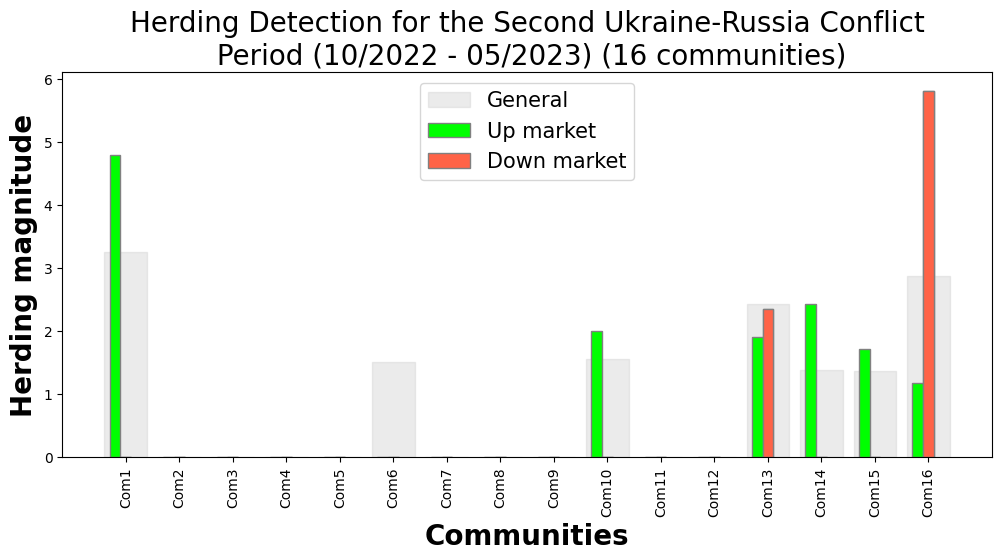

In [ ]:
##################################################### WITH NOISE ###################################################

barWidth = 0.2
fig = plt.subplots(figsize =(12, 5))


# Ped 1
# community_order = ["Com" + str(i) for i in range(1, len(ped_noise_dict_1.keys())+1)]

# Ped 2
# community_order = ["Com" + str(i) for i in range(1, len(ped_noise_dict_1.keys())+1)]

# Ped 3
# community_order = ["Com" + str(i) for i in range(1, len(ped_noise_dict_1.keys())+1)]

# Ped 4
# community_order = ["Com" + str(i) for i in range(1, len(ped_noise_dict_1.keys())+1)]

# Ped 5
community_order = ["Com" + str(i) for i in range(1, len(ped_noise_dict_1.keys())+1)]

###############################################  REVISION  ############################################################
# Ped 1
# csad_values = [-4.271, 0.0, -6.322, -11.419, 0.0, 0.0, -2.349, -6.085, -3.414, -6.680,  -4.190,  -4.959,    0.0,    0.0, -2.078, -2.020]
# up_market =   [ 0.0  , 0.0,    0.0,     0.0, 0.0, 0.0, -2.272,    0.0, -3.814,    0.0,  -3.584,  -9.277, -5.016,    0.0,    0.0, -1.950]
# down_market = [-4.895, 0.0,-10.403, -14.016, 0.0, 0.0, -2.791, -6.116, -3.050, -9.183,  -4.038,  -4.193,    0.0, -4.532, -3.303, -4.669]


#  Ped 2
# csad_values = [-1.927, -4.185, -2.984 , -3.007, -1.710, -1.636, -1.275, 0.0, -2.428, -2.658, -6.184, -1.230, -4.945]
# up_market =   [-1.292, -5.458, -4.240, -3.348, -1.839, -2.755, -1.152, -2.760, -3.343, -3.288, -8.001,  -2.635, -5.522]
# down_market = [-2.017, -3.580, -2.602, -2.883, -1.498, -1.457, -0.925,    0.0, -2.371, -2.342, -6.110,  -1.013, -4.723]

#  Ped 3

# csad_values = [0.0, -4.621, 0.0, 0.0, 0.0,    0.0, 0.0, -2.021, 0.0, 0.0, -1.007, -1.094, 0.0, -3.334]
# up_market =   [0.0, -5.892, 0.0, 0.0, 0.0, -1.535, 0.0,    0.0, 0.0, 0.0, -0.771, -1.399, 0.0, -3.936]
# down_market = [0.0, -9.688, 0.0, 0.0, 0.0,    0.0, 0.0, -2.000, 0.0, 0.0,    0.0, -1.971, 0.0, -2.934]

# Ped 4

# csad_values = [   0.0,  -5.310, -3.573, -3.884,    0.0, 0.0, -5.289, 0.0, 0.0, -5.607, 0.0, 0.0, 0.0, -5.871, -0.935]
# up_market =   [-2.636,     0.0, -2.711,    0.0,    0.0, 0.0, -5.437, 0.0, 0.0, -5.814, 0.0, 0.0, 0.0, -6.611, -2.137]
# down_market = [   0.0, -12.683, -3.904, -4.238, -9.529, 0.0,    0.0, 0.0, 0.0, -5.662, 0.0, 0.0, 0.0, -5.301, -0.579]

# Ped 5

# csad_values = [0.0, -12.426, 0.0,     0.0, 0.0, 0.0, -0.984, 0.0, 0.0, 0.0, 0.0, -2.072, -0.577, 0.0,    0.0, 0.0, 0.0]
# up_market =   [0.0,  -8.005, 0.0,     0.0, 0.0, 0.0,    0.0, 0.0, 0.0, 0.0, 0.0, -3.964,    0.0, 0.0, -3.818, 0.0, 0.0]
# down_market = [0.0, -13.235, 0.0,  -3.845, 0.0, 0.0, -0.632, 0.0, 0.0, 0.0, 0.0, -1.827, -0.326, 0.0,    0.0, 0.0, 0.0]


# Ped 6

# csad_values = [0.0, -2.420, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.650, 0.0, 0.0, -1.176]
# up_market =   [0.0, -1.408, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,    0.0, 0.0, 0.0,    0.0]
# down_market = [0.0, -2.485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.706, 0.0, 0.0, -0.991]

# Ped 7

csad_values = [-3.254, 0.0,  0.0, 0.0, 0.0, -1.512, 0.0, 0.0, 0.0, -1.565, 0.0, 0.0, -2.425,-1.378, -1.362, -2.876]
up_market =   [-4.797, 0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.998, 0.0, 0.0, -1.911, -2.424, -1.720, -1.170]
down_market = [   0.0, 0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,    0.0, 0.0, 0.0, -2.354,    0.0,    0.0, -5.818]

############################################### WITH NOISE  ############################################################

# Ped 1
# csad_values = [-4.271, 0.0, -6.322, -11.419, 0.0, 0.0, -2.349, -6.085, -3.414, -6.680,  -4.190,  -4.959,    0.0,    0.0, -2.078, -2.020]
# up_market =   [ 0.0  , 0.0,    0.0,     0.0, 0.0, 0.0, -2.272,    0.0, -3.814,    0.0,  -3.584,  -9.277, -5.016,    0.0,    0.0, -1.950]
# down_market = [-4.895, 0.0,-10.403, -14.016, 0.0, 0.0, -2.791, -6.116, -3.050, -9.183,  -4.038,  -4.193,    0.0, -4.532, -3.303, -4.669]


#  Ped 2
# csad_values = [-2.658, -1.927, -2.984, -4.185, -1.710, -1.636, -6.184, 0.0, -2.428,  -1.275,  -4.945, -1.230, 3.007  ]
# up_market =   [-3.288, -1.292, -4.240, -5.458, -1.839, -2.754, -8.001, -2.760, -3.343, -1.152, -5.522, -2.635, -3.348  ]
# down_market = [-2.342, -2.017, -2.602, -3.580, -1.498, -1.457, -6.110, 0.0, -2.371, -0.925, -4.723, -1.013, -2.883 ]


#  Ped 3

# csad_values = [ 0.0,  -3.962, 0.0, 0.0, 0.0, 0.0, -1.228, 0.0, 0.0, 0.0, 0.0, -1.180,  -3.058, 0.0,  -1.057, -1.994]
# up_market =   [ 0.0, -5.510, -6.208, 0.0, 0.0, 0.0, -1.386, -2.207, 0.0, 0.0, 0.0, -1.045,-3.212, 0.0, -1.339, -2.599  ]
# down_market = [ -2.933, -10.268, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.848, 0.0,  -1.838, 0.0 ]


# Ped 4

# csad_values = [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.249, 0.0, -1.539, 0.0, -2.934, 0.0, -2.059, 0.0,  0.0]
# up_market =   [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -10.235, 0.0, -1.313, 0.0, -3.951, 0.0,  -2.221, 0.0, 0.0 ]
# down_market = [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.614, 0.0, -2.306, 0.0, -1.691, 0.0, -1.368 ]


# Ped 5

# csad_values = [-2.886, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.583, 0.0,  -1.216, 0.0  ]
# up_market =   [-1.967, 0.0, 0.0, 0.0, -1.415, 0.0, -1.233, -0.664, 0.0, 0.0, -1.284, 0.0, 0.0, 0.0 ]
# down_market = [-2.949, 0.0, 0.0, -2.059, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.104, 0.0  ]



############################################### ENTIRE PERIOD WITH NOISE ###############################################
# csad_values = [0.0, -2.422, -1.821, -2.6917, -1.456, -1.475, 0.0,  0.0, -1.079, -1.757, -2.689, -1.892, 0.0]
# up_market = [-0.616, -1.660, -1.298, -3.728, -1.369, -1.485, 0.0, 0.0, 0.0, -1.805, -1.533, -2.298, -1.51]
# down_market = [0.0, -2.444, -1.846, -2.598, -1.437, -1.396, 0.0, 0.0, -1.016, -1.398, -2.470, -1.722, 0.0]


# Set position of bar on X axis
br1 = np.arange(len(up_market))
br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]

shade_width = 0.03
count = 0


barvector = plt.bar(br2, np.abs(down_market), color ='tomato', width = barWidth,
		edgecolor ='grey')

for bar in barvector:
    plt.fill_between([bar.get_x() - 10*shade_width, bar.get_x() + barWidth + 10*shade_width],
                     0, np.abs(csad_values[count]), color='silver', alpha=0.3)
    # plt.fill_between([bar.get_x() - shade_width, bar.get_x() + barWidth + shade_width],
    #                  csad_values[count], csad_values[count] + 1, color='gray', alpha=0.1)
    count = count + 1
    # if count == len(br1):
    #   plt.fill_between([bar.get_x() - 10*shade_width, bar.get_x() + barWidth + 10*shade_width],
    #                  0, np.abs(csad_values[count-1]), color='whitesmoke', alpha=0.3, label = "General")

plt.fill_between([0,0],
                      0, 0, color='silver', alpha=0.3, label = "General")

# Make the plot
plt.bar(br1, np.abs(up_market), color ='lime', width = barWidth,
		edgecolor ='grey', label ='Up market')
barvector = plt.bar(br2, np.abs(down_market), color ='tomato', width = barWidth,
		edgecolor ='grey', label ='Down market')
# plt.bar(br3, np.abs(csad_values), color ='b', width = barWidth,
#  		edgecolor ='grey', label ='CSAD')


# Adding Xticks
plt.xlabel('Communities', fontweight ='bold', fontsize = 20)
plt.ylabel('Herding magnitude', fontweight ='bold', fontsize = 20)
plt.xticks([r + barWidth for r in range(len(up_market))], community_order, rotation = 90)

plt.legend(fontsize = 15)
plt.title("Herding Detection for the Second Ukraine-Russia Conflict\n Period (10/2022 - 05/2023) (16 communities)", fontsize = 20)
plt.savefig("drive/MyDrive/Plos_revision/figures/herding_communitywise_withnoise_ped7.tiff", format = "tiff", dpi = 300, bbox_inches='tight',pad_inches = 0.1)

plt.savefig("drive/MyDrive/Plos_revision/figures/herding_communitywise_withnoise_ped7.png", dpi = 300,  bbox_inches='tight',pad_inches = 0.1)


# **Sectors Distribution in Each Community**

In [ ]:
asset_cate = pd.read_excel("data/stock_category.xlsx") # Asset labels

In [ ]:
def distribution_sectors(asset_cate1, community_nonoise_1, text, ped, isnoise):
  dict_sectors = dict()
  key_sectors = list(set(asset_cate1["Sectors"]))

  dict_sectors.update({key: [0]*len(community_nonoise_1.groupby(by = "group")) for key in key_sectors})

  ped_nonoise_1 = community_nonoise_1.groupby("group")
  ped_nonoise_dict_1 = {}
  for i in ped_nonoise_1:
    ped_nonoise_dict_1["group_"+ str(i[1]["group"].values[0])] =i[1]["symbol"].values


  inx = 0
  for gr in ped_nonoise_dict_1:
    comm = pd.DataFrame(data = ped_nonoise_dict_1[gr], columns = ["Stocks"])

    comm_merge = pd.merge(comm,asset_cate1, on = "Stocks" )

    count = []
    percentage_sector = {}
    for i in comm_merge.groupby(by ="Sectors"):
      percentage_sector[i[1].values[0][1]] = i[1]["Stocks"].count()
      count.append(i[1]["Stocks"].count())

    for s in percentage_sector:
      percentage_sector[s] = percentage_sector[s]/np.sum(count)
      dict_sectors[s][inx]= percentage_sector[s]

    #print(percentage_sector)

    inx = inx +1

  df = pd.DataFrame.from_dict(dict_sectors)

  sector_colors = {"Real Estate":0, "Consumer Discretionary": 1,"Financials":2, "Information Technology": 3, "Crypto": 4,
                  "US ETF":5, "Materials":6, "Industrials":7, "Healthcare":8, "Consumer Staples":9, "Energy":10,
                  "Utilities": 11}

  comm_symbols = ["Com " +str(i+1) for i in range(inx)]
  print("number of communities: ", comm_symbols)
  # comm_symbols = ["Com 1", "Com 2", "Com 3", "Com 4", "Com 5", "Com 6", "Com 7","Com 8",
  #                 "Com 9","Com 10","Com 11","Com 12"]


  num_partitions = {}


  comm_part = pd.DataFrame.from_dict(dict_sectors)
  comm_part = comm_part>0.0
  comm_part_sum = comm_part.sum(axis =1)

  for i in range(len(comm_part)):
    num_partitions[str(i)] = comm_part_sum.iloc[i]


  # Assuming you have a DataFrame named df with 10 columns and 12 rows
  # Replace this with your actual DataFrame

  # Example DataFrame creation (replace this with your actual DataFrame)


  data = dict_sectors
  df = pd.DataFrame.from_dict(data)
  #df = final_df
  # Set up the figure and axis
  plt.subplots(figsize =(15,5))

  colors = ['maroon', 'olive', 'teal', 'navy', 'orange', 'cyan', 'magenta', 'purple',
            'yellow', 'red', 'lime', 'green']
  # Plot non-zero values for each row with dashed horizontal lines
  non_zero_values = []
  for index, row in df.iterrows():
    plt.axvline(index -0.06 +0.25*index, ls ='--', color = 'grey')
    non_zero_values.append([(col, val,index) for col, val in zip(df.columns, row) if val != 0])
    # ordered non_zero_values here
  plt.axvline(len(df) -0.06 +0.25*len(df), ls ='--', color = 'grey')
  non_zero_values = flatten_list(non_zero_values)
  non_zero_values.sort(key = lambda x: x[0])
  #print(non_zero_values)
  for col, val, index in non_zero_values:
      print(index)
      x_values = np.linspace(index*1.25, index*1.25 + val/1.05,1000) #////////////////////////
      if num_partitions[str(index)] == 1:
        x_values = np.linspace(index*1.25, index*1.25 + val*1.1,1000)
      y_values = [col] * len(x_values)
      print(y_values)
      #print(col)
      plt.plot(x_values, y_values, color= colors[sector_colors[col]], linestyle='-', linewidth = 6)

  # Set the axis labels
  plt.xlabel('Communities',  fontweight ='bold', fontsize = 20)

  x = [i*1.25 + 0.55 for i in range(len(df))]
  my_xticks = comm_symbols
  plt.xticks(x, my_xticks, rotation = 90)
  plt.ylabel('Sectors', fontweight ='bold', fontsize = 20)
  # Ukraine-Russia Conflict
  plt.title("Distribution of Financial Sectors in each Community throughout the Second Ukraine-Russia Conflict Period", fontsize =  17)
  # Display the chart
  plt.savefig("drive/MyDrive/Plos_revision/figures/"+"dist_sectors_"+ ped+ "_" + isnoise +".png", dpi = 300, bbox_inches='tight',pad_inches = 0.1)
  plt.savefig("drive/MyDrive/Plos_revision/figures/"+"dist_sectors_"+ ped+ "_" + isnoise +".tiff", format = "tiff", dpi = 300, bbox_inches='tight',pad_inches = 0.1)


number of communities:  ['Com 1', 'Com 2', 'Com 3', 'Com 4', 'Com 5', 'Com 6', 'Com 7', 'Com 8', 'Com 9', 'Com 10', 'Com 11', 'Com 12', 'Com 13', 'Com 14', 'Com 15', 'Com 16']
0
['Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discretionary', 'Consumer Discr

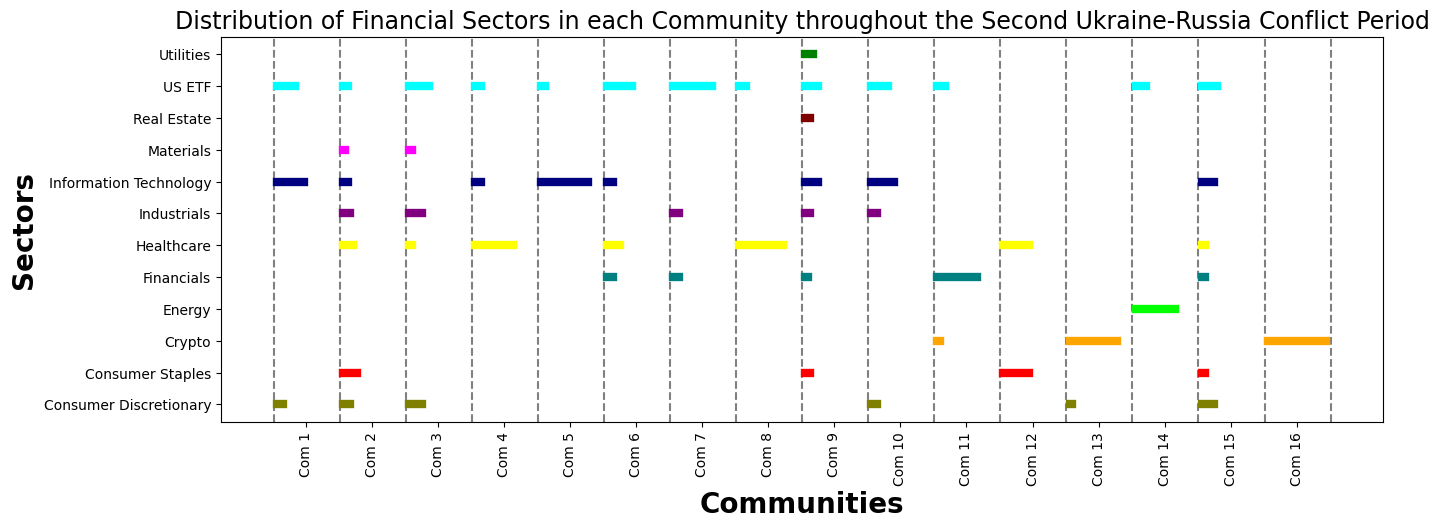

In [ ]:
distribution_sectors(asset_cate, community_noise_1," ", "ped7", "withnoise")
